## Observations and Insights 

import matplotlib.pyplot as plt import pandas as pd import scipy.stats as st

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import linear_model

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
complete_df = pd.merge(mouse_metadata, study_results, how = "left", on = ["Mouse ID"]) 
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
len(mouse_metadata ['Mouse ID'].unique())

249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

complete_df[complete_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=True)



In [26]:
# Checking the number of mice in the clean DataFrame.
complete_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

complete_mean = complete_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].mean() 
complete_std = complete_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].std() 
complete_sem = complete_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].sem() 
complete_variance = complete_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].var() 
complete_median = complete_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].median()

# Assemble the resulting series into a single summary dataframe.

complete_stats = pd.DataFrame([complete_mean, complete_std, complete_sem, complete_variance, complete_median]) 
complete_stats 
print(complete_mean) 
print(complete_stats) 
complete_stats.index = ['mean', 'std', 'sem', 'var', 'median'] 
complete_stats




Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen        Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
Tumor Volume (mm3)  40.675741  52.591172  52.884795  55.235638  54.331565   
Tumor Volume (mm3)   4.994774   6.268188   6.567243   8.279709   8.134708   
Tumor Volume (mm3)   0.329346   0.469821   0.492236   0.603860   0.596466   
Tumor Volume (mm3)  24.947764  39.290177  43.128684  68.553577  66.173479   
Tumor Volume (mm3)  41.557809  51.776157  51.820584  53.698743  52.509285   

Drug Regimen          Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Tumor Volume (mm3)  54.033581  52.393463  40.216745  54.233149  53.236507  
Tumor Volume (mm3)   7.821003   6.568014   4.846308   7.710419   6.966589  
Tumor Volume (mm3)   0.58

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
sem,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398
var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'std', 'var', 'sem', 'median']).T

# Using the aggregation method, produce the same summary statistics in a single line


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.393463,40.216745,54.233149,53.236507
std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.568014,4.846308,7.710419,6.966589
var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.138803,23.486704,59.450562,48.533355
sem,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.525862,0.320955,0.573111,0.516398
median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.909965,40.673236,52.431737,51.818479


## Bar and Pie Charts

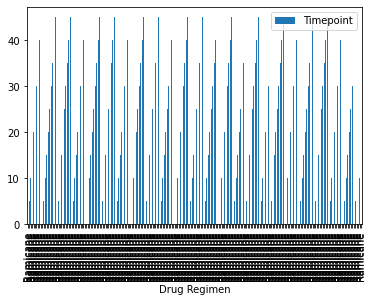

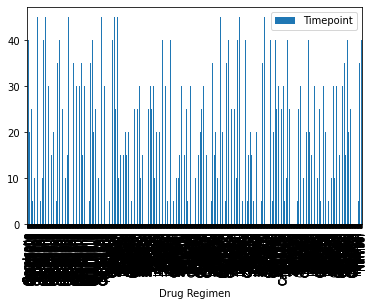

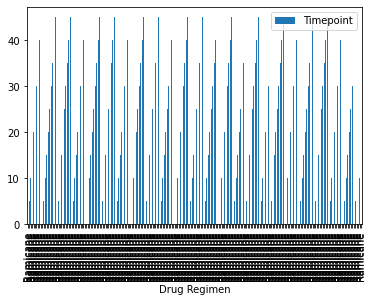

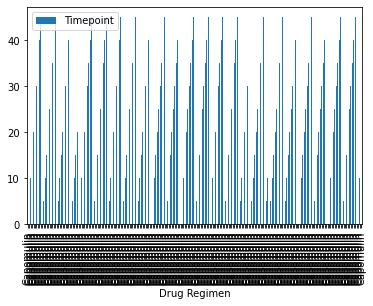

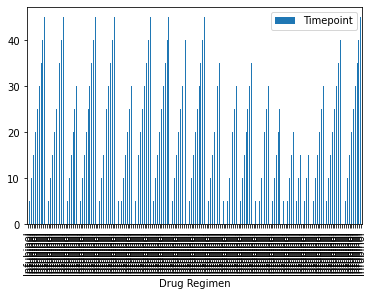

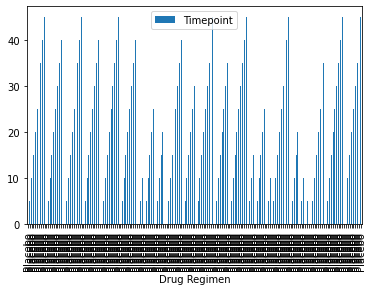

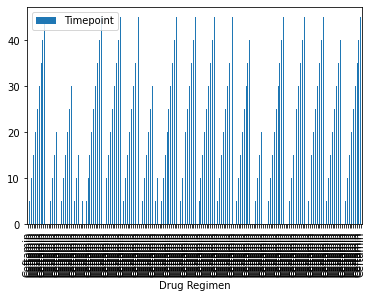

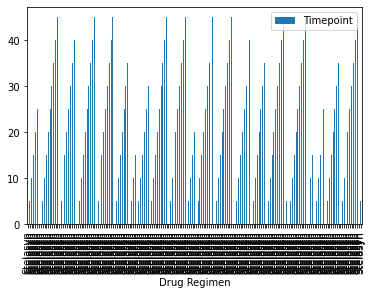

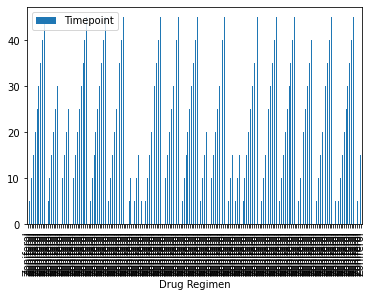

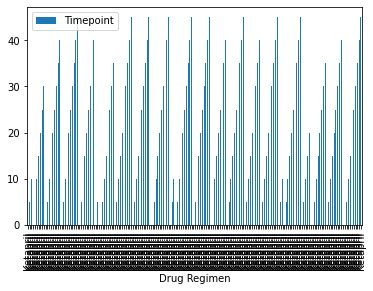

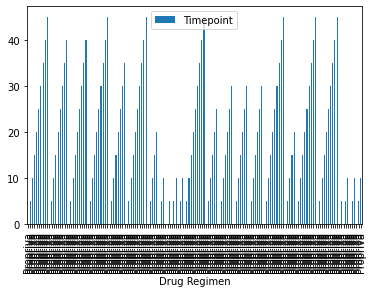

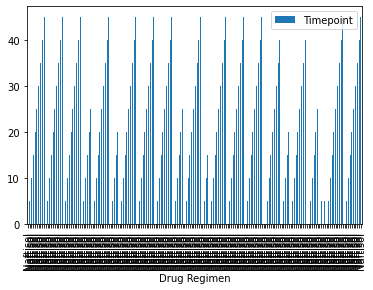

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

complete_df[complete_df['Drug Regimen'] == 'Ramicane'].plot.bar(x='Drug Regimen', y='Timepoint')
complete_df.plot.bar(x="Drug Regimen", y="Timepoint")

for drug in complete_df['Drug Regimen'].unique():
    complete_df[complete_df['Drug Regimen'] == drug].plot.bar(x='Drug Regimen', y='Timepoint')
    plt.show()


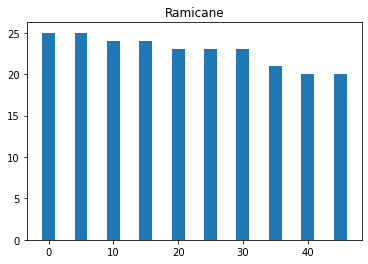

Ramicane


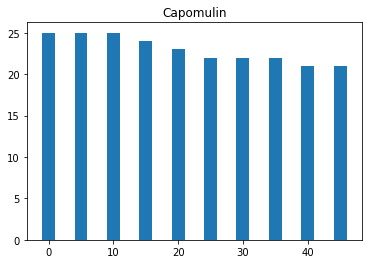

Capomulin


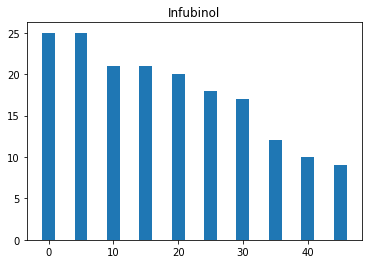

Infubinol


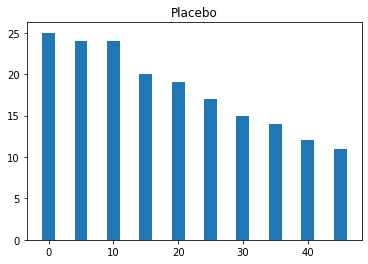

Placebo


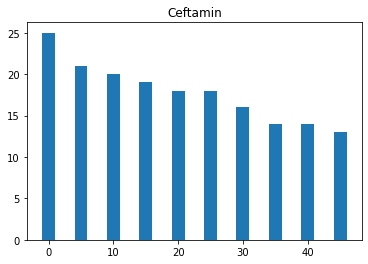

Ceftamin


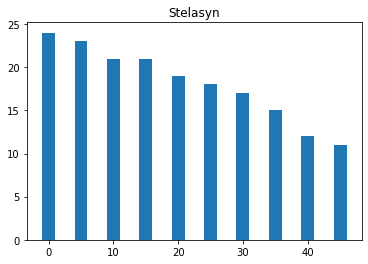

Stelasyn


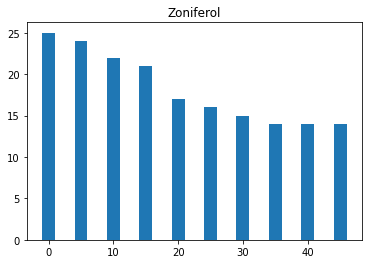

Zoniferol


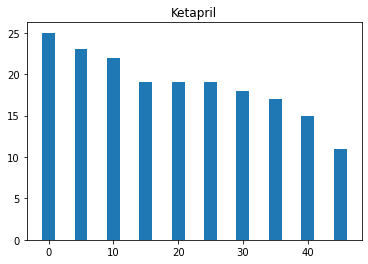

Ketapril


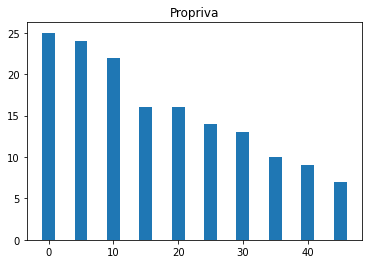

Propriva


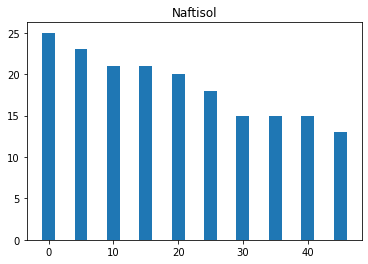

Naftisol


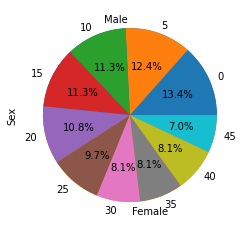

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

for drug in complete_df['Drug Regimen'].unique():
    drug_timepoint = complete_df[complete_df['Drug Regimen'] == drug]['Timepoint'].value_counts()
    x = drug_timepoint.index.tolist()
    y = drug_timepoint.values.tolist()

    plt.bar(x, y, width=2)
    plt.title(drug)
    plt.show()
    print(drug)

# Generate a pie plot showing the distribution of female versus male mice using Pandas

complete_df['Sex'].value_counts().plot.pie()

mouse_gender = complete_df['Sex'].value_counts() 
x = drug_timepoint.index.tolist() 
y = drug_timepoint.values.tolist()

plt.pie(y, labels=x, autopct='%1.1f%%') 
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

final_tumor_vol = {'Capomulin': [], 'Ramicane': [], 'Infubinol': [], 'Ceftamin': [], 'Mouse ID': []}

for mouse_id, time in complete_df.groupby('Mouse ID')['Timepoint'].max().iteritems(): 
    for drug in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']: 
        try: 
    # print(mouse_id, time, drug) 
            tumor_size = complete_df[(complete_df['Mouse ID'] == mouse_id) & (complete_df['Timepoint'] == time) & (complete_df['Drug Regimen'] == drug)]['Tumor Volume (mm3)'].values[0] 
        except: 
            tumor_size = None 
            
        final_tumor_vol[drug].append(tumor_size) 
    final_tumor_vol['Mouse ID'].append(mouse_id)
        

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

complete_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#create new df with calculations from above

final_tumor_vol = pd.DataFrame(final_tumor_vol) 
print(final_tumor_vol)

final_tumor_vol.set_index("Mouse ID")

final_ram = final_tumor_vol[final_tumor_vol['Ramicane'].notnull()] ['Ramicane'] 
final_cap = final_tumor_vol[final_tumor_vol['Capomulin'].notnull()] ['Capomulin'] 
final_inf = final_tumor_vol[final_tumor_vol['Infubinol'].notnull()] ['Infubinol'] 
final_cef = final_tumor_vol[final_tumor_vol['Ceftamin'].notnull()] ['Ceftamin']

q1 = final_ram.quantile(.25) 
q3 = final_ram.quantile(.75) 
mask = final_ram.between(q1, q3, inclusive='both') 
print(final_ram[mask])



     Capomulin   Ramicane  Infubinol   Ceftamin Mouse ID
0          NaN        NaN  67.973419        NaN     a203
1          NaN        NaN  65.525743        NaN     a251
2          NaN        NaN        NaN        NaN     a262
3          NaN        NaN        NaN  62.999356     a275
4          NaN        NaN        NaN        NaN     a366
..         ...        ...        ...        ...      ...
244        NaN        NaN        NaN        NaN     z435
245        NaN  30.638696        NaN        NaN     z578
246        NaN        NaN  62.754451        NaN     z581
247        NaN        NaN        NaN        NaN     z795
248        NaN        NaN        NaN        NaN     z969

[249 rows x 5 columns]
6      38.407618
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
77     33.562402
78     36.374510
92     31.560470
94     36.134852
159    36.561652
167    37.225650
Name: Ramicane, dtype: float64


In [38]:
# Put treatments into a list for for loop (and later for plot labels)

complete_df['Drug Regimen'].unique()



# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes


# add subset 


# Determine outliers using upper and lower bounds

q1 = df['col'].quantile(.25)
    
# Select the 3rd quartile

q3 = df['col'].quantile(.75)
    
# Filtering the initial dataframe with a mask 

mask = df['col'].between(q1, q3, inclusive=True)
    

NameError: name 'df' is not defined

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


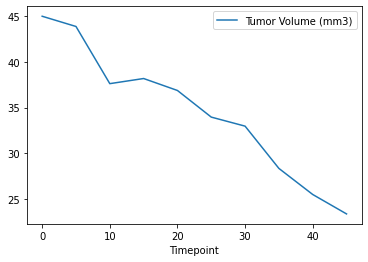

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
complete_df[complete_df['Mouse ID']=='s185'].plot.line(x='Timepoint', y='Tumor Volume (mm3)')
complete_df[complete_df['Mouse ID']=='s185']

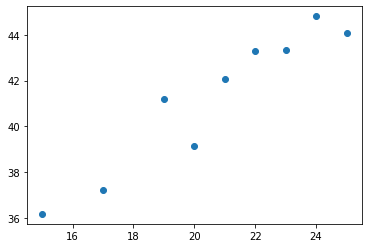

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_weight = complete_df[complete_df['Drug Regimen']=='Capomulin'].groupby('Weight (g)').agg(['mean'])['Tumor Volume (mm3)'

x = avg_weight.index.tolist() 
y = avg_weight.values.tolist()

plt.scatter(x=x, y=y) 
plt.show()

## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_weight = avg_weight.reset_index(level=0)

In [61]:
avg_weight.columns = ['Mouse Weight', 'Average Tumor Size']
avg_weight

,Mouse Weight,Average Tumor Size
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [63]:
avg_weight.corr()

,Mouse Weight,Average Tumor Size
Mouse Weight,1.000000,0.950524
Average Tumor Size,0.950524,1.000000


In [69]:
x = avg_weight['Mouse Weight'].values
y = avg_weight['Average Tumor Size'].values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

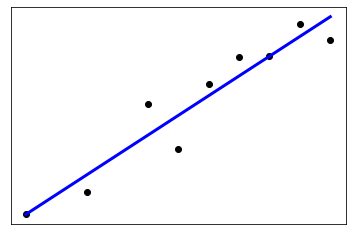

In [71]:
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()